In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
rice_df = pd.read_csv("Rice_data_type.csv")

In [4]:
rice_df.head()

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [5]:
rice_df= rice_df.drop(rice_df.columns[0], axis=1)
rice_df=rice_df.drop(columns=['Class'])


In [6]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [7]:
X = rice_df.iloc[:, :-1].values
y = rice_df.iloc[:, -1].values

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
input_shape = [X_train.shape[1]]

In [28]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])


C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
import pickle

In [31]:
model.compile(optimizer='adam',
              loss='mae') 

In [32]:
 y_train = y_train.astype(float)
y_val = y_val.astype(float)
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                   batch_size=256, 
                   epochs=15,
 
                   )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5520 - val_loss: 0.2509
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2602 - val_loss: 0.2115
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1995 - val_loss: 0.1751
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1767 - val_loss: 0.1478
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1464 - val_loss: 0.1148
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1149 - val_loss: 0.0808
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824 - val_loss: 0.0676
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0656 - val_loss: 0.0675
Epoch 9/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670 - val_loss: 0.0657
Epoch 10/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0646 - val_loss: 0.0648
Epoch 11/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0647 - val_loss: 0.0634
Epoch 12/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0633 - val_lo

In [33]:
predictions = model.predict(X_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
predicted_labels = predictions.round().astype(int)


<Axes: >

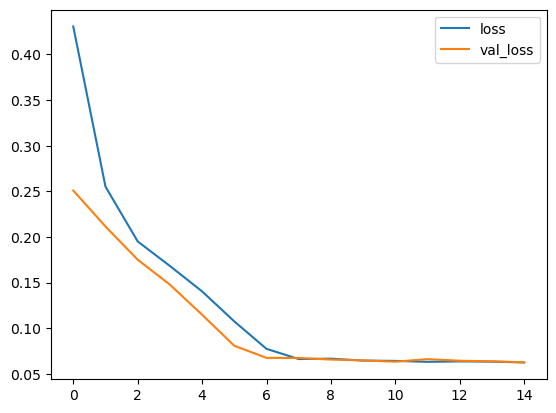

In [35]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


In [36]:
model1 = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='sigmoid',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])
model1.summary()
model1.compile(optimizer='adam',  
              loss='mae') 
y_train = y_train.astype(float)
y_val = y_val.astype(float)
losses = model1.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                   batch_size=256, 
                   epochs=15,
 
                   )
predictions = model1.predict(X_test)
predicted_labels = predictions.round().astype(int)
loss_df = pd.DataFrame(losses.history)


C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1315 - val_loss: 0.0833
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775 - val_loss: 0.0644
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0668 - val_loss: 0.0642
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651 - val_loss: 0.0642
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0637 - val_loss: 0.0644
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0646 - val_loss: 0.0648
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0659 - val_loss: 0.0644
Epoch 9/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0661 - val_loss: 0.0644
Epoch 10/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0646 - val_loss: 0.0655
Epoch 11/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0664 - val_loss: 0.0643
Epoch 12/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0657 - val_lo

<Axes: >

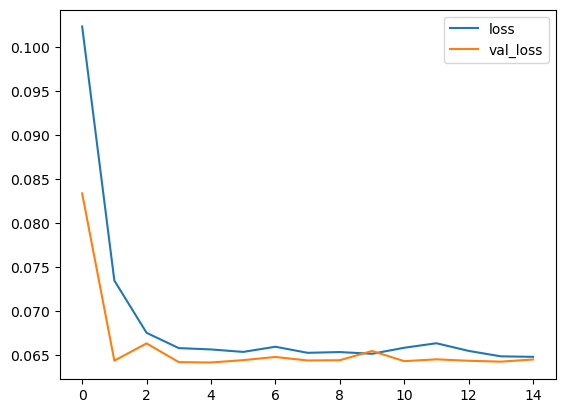

In [37]:
loss_df.loc[:,['loss','val_loss']].plot()


In [38]:
import pickle